In [2]:
import pandas as pd

# Load the cleaned fuel data
df = pd.read_csv('clean_fuel.csv')

# Filter rows where fuel economy values are greater than zero
df = df[(df['city_mpg_ft1'] > 0) & (df['highway_mpg_ft1'] > 0)]

# Group the data by car make and calculate summary statistics for highway and city mileage
mileage_stats_by_make = df.groupby('make')[['city_mpg_ft1', 'highway_mpg_ft1']].agg(['mean', 'median', 'std', 'min', 'max'])

# Display the summary statistics
print("Summary Statistics for Highway and City Mileage by Car Make:")
print(mileage_stats_by_make)

# Save the filtered dataframe to a new CSV file
df.to_csv('clean_fuel_filtered.csv', index=False)

print("Filtered data saved to clean_fuel_filtered.csv")


Summary Statistics for Highway and City Mileage by Car Make:
                   city_mpg_ft1                          highway_mpg_ft1  \
                           mean median       std min max            mean   
make                                                                       
Audi                  34.333333   33.0  2.309401  33  37       38.000000   
BMW                   30.615385   28.0  6.714890  23  41       31.461538   
Cadillac              30.250000   31.0  1.500000  28  31       34.000000   
Chevrolet             37.285714   35.0  3.903600  35  43       40.571429   
Chrysler              32.000000   32.0       NaN  32  32       33.000000   
Fisker                20.000000   20.0       NaN  20  20       21.000000   
Ford                  40.400000   40.0  0.966092  40  43       36.700000   
Honda                 47.000000   47.0       NaN  47  47       46.000000   
Hyundai               38.000000   38.0  0.000000  38  38       40.500000   
Kia                   38.00

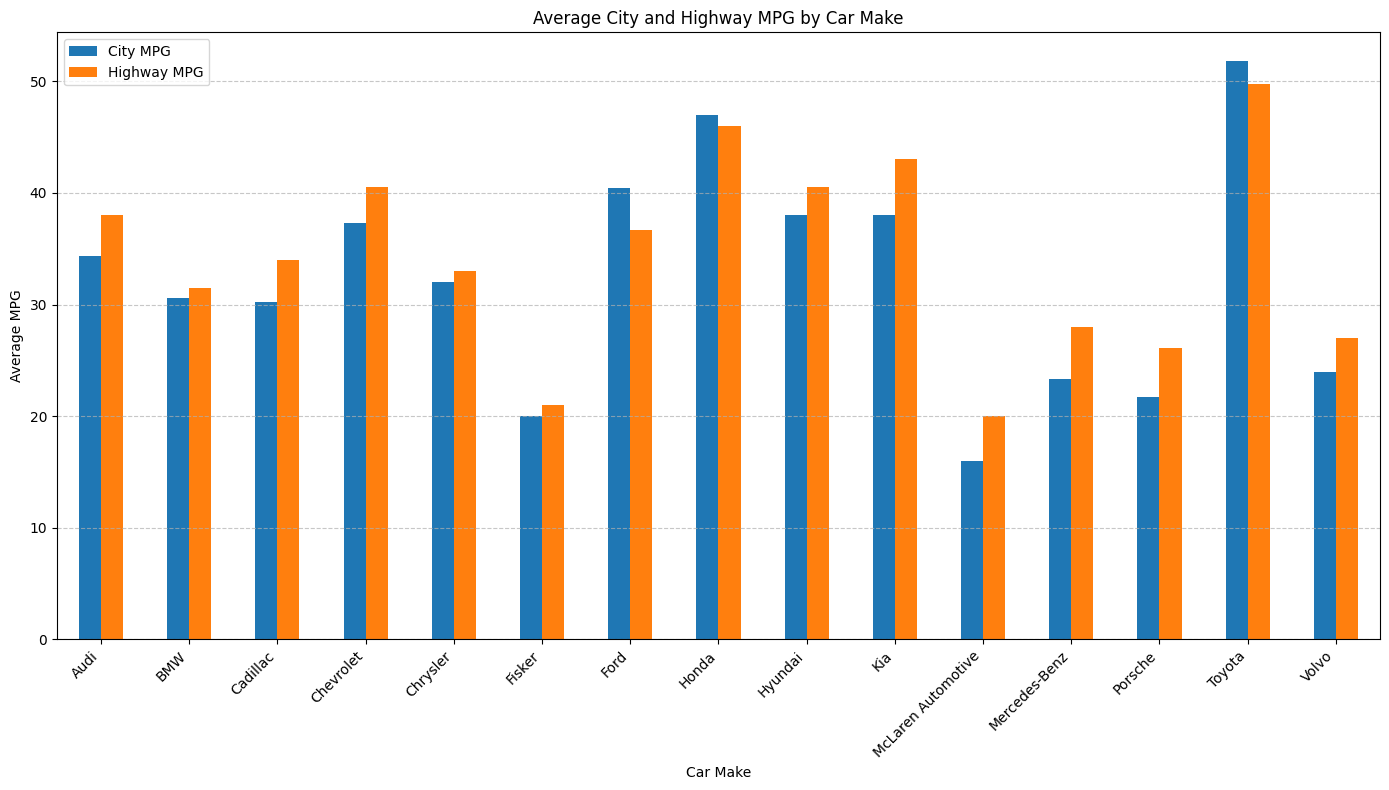

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned fuel data
df = pd.read_csv('clean_fuel.csv')

# Filter rows where fuel economy values are greater than zero
df = df[(df['city_mpg_ft1'] > 0) & (df['highway_mpg_ft1'] > 0)]

# Group the data by car make and calculate mean city and highway mpg
mileage_by_make = df.groupby('make')[['city_mpg_ft1', 'highway_mpg_ft1']].mean()

# Plot the bar graph
mileage_by_make.plot(kind='bar', figsize=(14, 8))
plt.title('Average City and Highway MPG by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Average MPG')
plt.xticks(rotation=45, ha='right')
plt.legend(['City MPG', 'Highway MPG'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


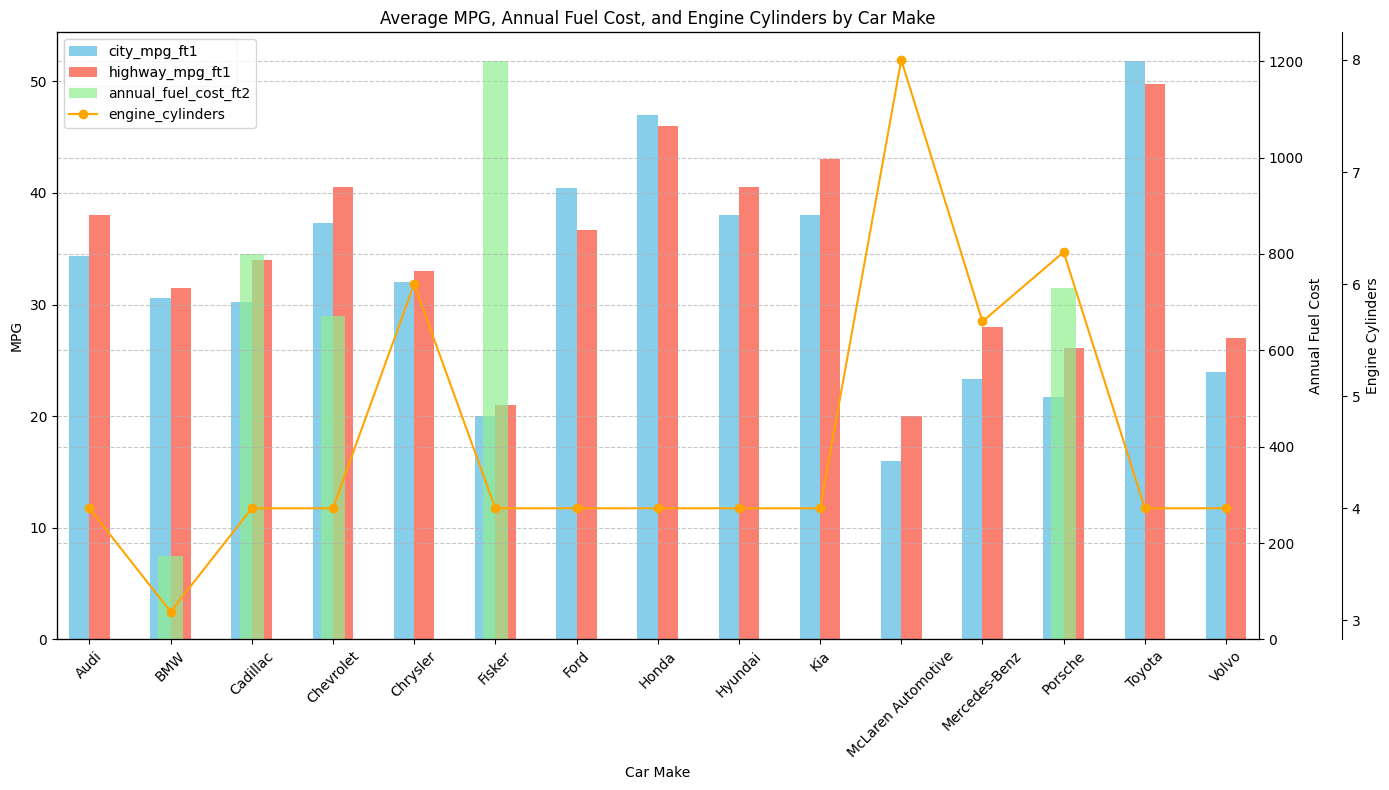

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned fuel data
df = pd.read_csv('clean_fuel.csv')

# Filter rows where fuel economy values, annual fuel cost, and engine cylinder count are greater than zero


# Group the data by car make and calculate mean city and highway mpg, average annual fuel cost, and average engine cylinder count
mileage_cost_cylinder_by_make = df.groupby('make')[['city_mpg_ft1', 'highway_mpg_ft1', 'annual_fuel_cost_ft2', 'engine_cylinders']].mean()

# Plot the bar graph
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot city and highway mpg on the primary y-axis
mileage_cost_cylinder_by_make[['city_mpg_ft1', 'highway_mpg_ft1']].plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_ylabel('MPG')
ax1.set_xlabel('Car Make')
ax1.tick_params(axis='x', rotation=45)  # Adjust x-axis label rotation
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create a secondary y-axis for annual fuel cost
ax2 = ax1.twinx()
mileage_cost_cylinder_by_make['annual_fuel_cost_ft2'].plot(kind='bar', ax=ax2, color='lightgreen', alpha=0.7, width=0.3)
ax2.set_ylabel('Annual Fuel Cost')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Create another secondary y-axis for engine cylinders
ax3 = ax1.twinx()
mileage_cost_cylinder_by_make['engine_cylinders'].plot(kind='line', ax=ax3, color='orange', marker='o')
ax3.set_ylabel('Engine Cylinders')
ax3.spines['right'].set_position(('outward', 60))

# Adjust legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

# Title
plt.title('Average MPG, Annual Fuel Cost, and Engine Cylinders by Car Make')

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\eddum\AppData\Local\Temp\ipykernel_19480\338526583.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['annual_fuel_cost_ft2'].fillna(mean_annual_fuel_cost, inplace=True)


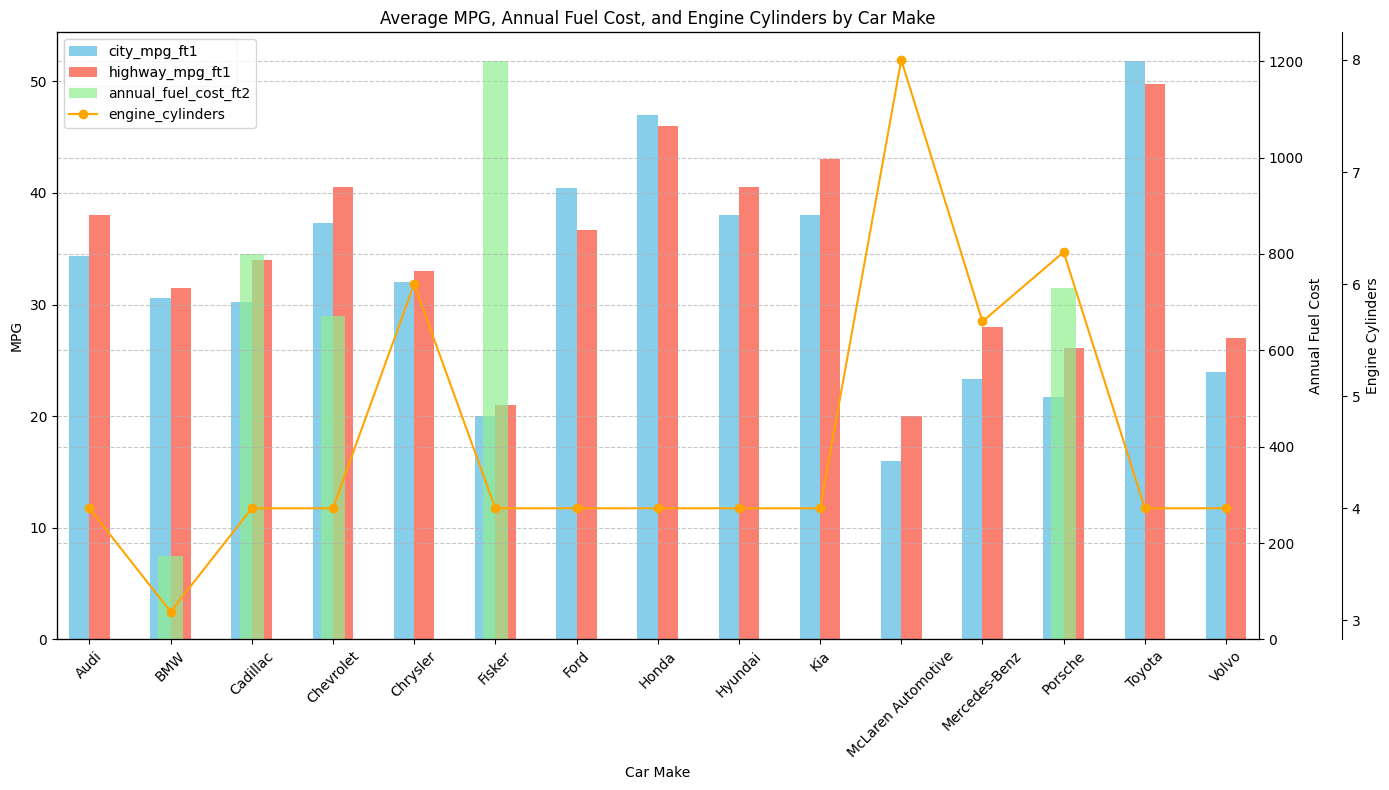

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned fuel data
df = pd.read_csv('clean_fuel.csv')

# Impute missing values in the 'annual_fuel_cost_ft2' column with the mean value
mean_annual_fuel_cost = df['annual_fuel_cost_ft2'].mean()
df['annual_fuel_cost_ft2'].fillna(mean_annual_fuel_cost, inplace=True)

# Group the data by car make and calculate mean city and highway mpg, average annual fuel cost, and average engine cylinder count
mileage_cost_cylinder_by_make = df.groupby('make')[['city_mpg_ft1', 'highway_mpg_ft1', 'annual_fuel_cost_ft2', 'engine_cylinders']].mean()

# Plot the bar graph
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot city and highway mpg on the primary y-axis
mileage_cost_cylinder_by_make[['city_mpg_ft1', 'highway_mpg_ft1']].plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_ylabel('MPG')
ax1.set_xlabel('Car Make')
ax1.tick_params(axis='x', rotation=45)  # Adjust x-axis label rotation
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create a secondary y-axis for annual fuel cost
ax2 = ax1.twinx()
mileage_cost_cylinder_by_make['annual_fuel_cost_ft2'].plot(kind='bar', ax=ax2, color='lightgreen', alpha=0.7, width=0.3)
ax2.set_ylabel('Annual Fuel Cost')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Create another secondary y-axis for engine cylinders
ax3 = ax1.twinx()
mileage_cost_cylinder_by_make['engine_cylinders'].plot(kind='line', ax=ax3, color='orange', marker='o')
ax3.set_ylabel('Engine Cylinders')
ax3.spines['right'].set_position(('outward', 60))

# Adjust legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

# Title
plt.title('Average MPG, Annual Fuel Cost, and Engine Cylinders by Car Make')

# Show the plot
plt.tight_layout()
plt.show()


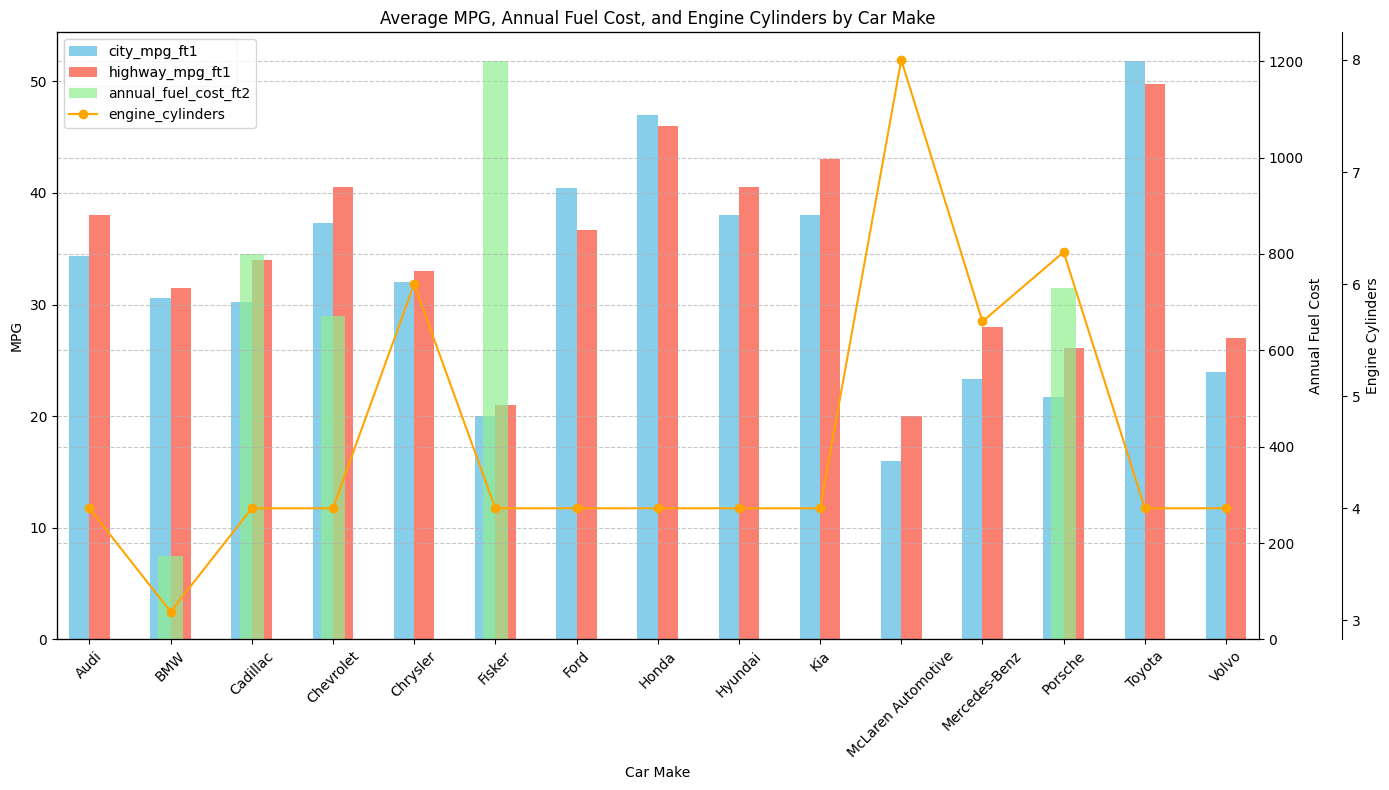

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned fuel data
df = pd.read_csv('clean_fuel.csv')

# Impute missing values in the 'annual_fuel_cost_ft2' column with the mean value
mean_annual_fuel_cost = df['annual_fuel_cost_ft2'].mean()
df['annual_fuel_cost_ft2'] = df['annual_fuel_cost_ft2'].fillna(mean_annual_fuel_cost)

# Group the data by car make and calculate mean city and highway mpg, average annual fuel cost, and average engine cylinder count
mileage_cost_cylinder_by_make = df.groupby('make')[['city_mpg_ft1', 'highway_mpg_ft1', 'annual_fuel_cost_ft2', 'engine_cylinders']].mean()

# Plot the bar graph
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot city and highway mpg on the primary y-axis
mileage_cost_cylinder_by_make[['city_mpg_ft1', 'highway_mpg_ft1']].plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_ylabel('MPG')
ax1.set_xlabel('Car Make')
ax1.tick_params(axis='x', rotation=45)  # Adjust x-axis label rotation
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create a secondary y-axis for annual fuel cost
ax2 = ax1.twinx()
mileage_cost_cylinder_by_make['annual_fuel_cost_ft2'].plot(kind='bar', ax=ax2, color='lightgreen', alpha=0.7, width=0.3)
ax2.set_ylabel('Annual Fuel Cost')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Create another secondary y-axis for engine cylinders
ax3 = ax1.twinx()
mileage_cost_cylinder_by_make['engine_cylinders'].plot(kind='line', ax=ax3, color='orange', marker='o')
ax3.set_ylabel('Engine Cylinders')
ax3.spines['right'].set_position(('outward', 60))

# Adjust legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

# Title
plt.title('Average MPG, Annual Fuel Cost, and Engine Cylinders by Car Make')

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\eddum\AppData\Local\Temp\ipykernel_19480\3772553540.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['annual_fuel_cost_ft2'].fillna(mean_annual_fuel_cost, inplace=True)


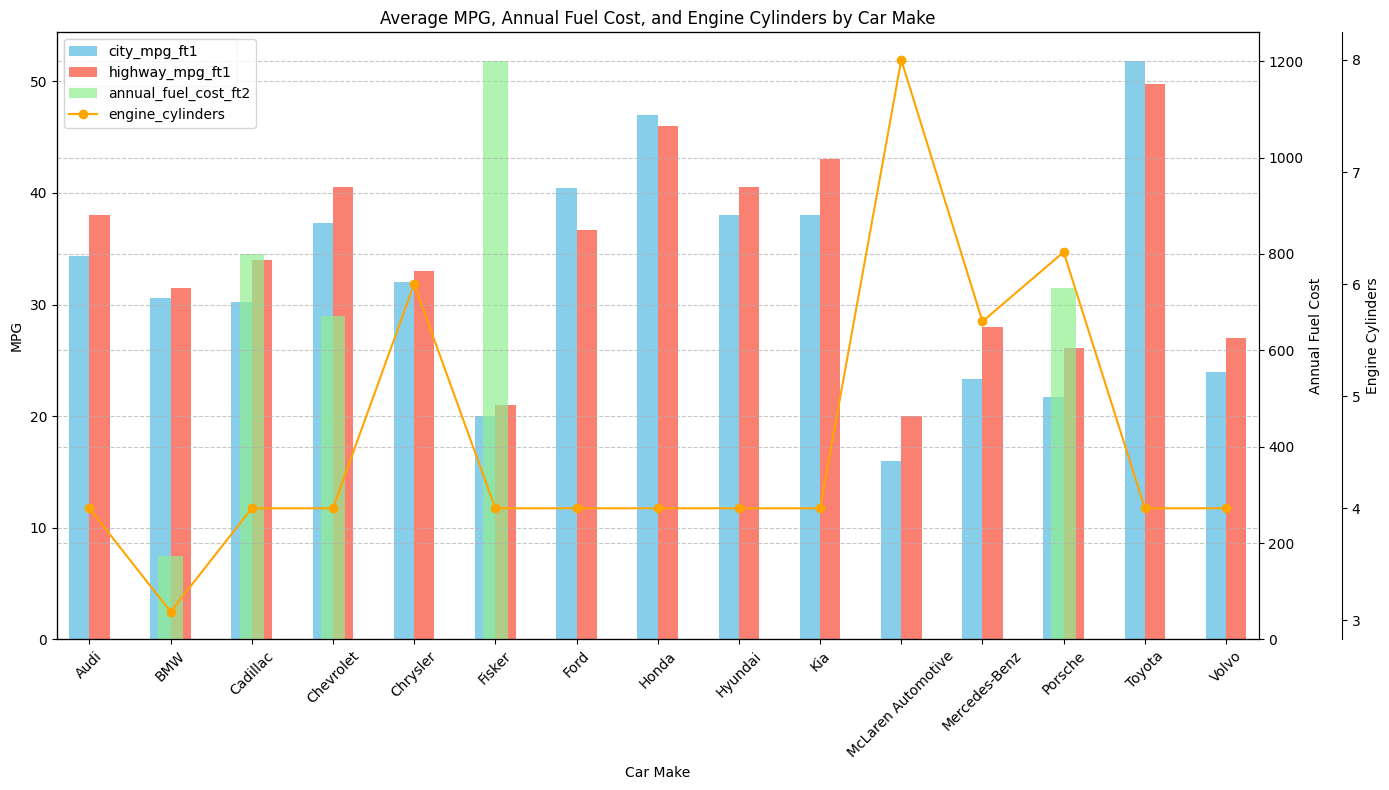

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned fuel data
df = pd.read_csv('clean_fuel.csv')

# Calculate the mean annual fuel cost for all car makes
mean_annual_fuel_cost = df['annual_fuel_cost_ft2'].mean()

# Fill NaN values in the 'annual_fuel_cost_ft2' column with the mean value
df['annual_fuel_cost_ft2'].fillna(mean_annual_fuel_cost, inplace=True)

# Group the data by car make and calculate mean city and highway mpg, average annual fuel cost, and average engine cylinder count
mileage_cost_cylinder_by_make = df.groupby('make')[['city_mpg_ft1', 'highway_mpg_ft1', 'annual_fuel_cost_ft2', 'engine_cylinders']].mean()

# Plot the bar graph
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot city and highway mpg on the primary y-axis
mileage_cost_cylinder_by_make[['city_mpg_ft1', 'highway_mpg_ft1']].plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_ylabel('MPG')
ax1.set_xlabel('Car Make')
ax1.tick_params(axis='x', rotation=45)  # Adjust x-axis label rotation
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create a secondary y-axis for annual fuel cost
ax2 = ax1.twinx()
mileage_cost_cylinder_by_make['annual_fuel_cost_ft2'].plot(kind='bar', ax=ax2, color='lightgreen', alpha=0.7, width=0.3)
ax2.set_ylabel('Annual Fuel Cost')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Create another secondary y-axis for engine cylinders
ax3 = ax1.twinx()
mileage_cost_cylinder_by_make['engine_cylinders'].plot(kind='line', ax=ax3, color='orange', marker='o')
ax3.set_ylabel('Engine Cylinders')
ax3.spines['right'].set_position(('outward', 60))

# Adjust legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

# Title
plt.title('Average MPG, Annual Fuel Cost, and Engine Cylinders by Car Make')

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\eddum\AppData\Local\Temp\ipykernel_19480\3931700726.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['annual_fuel_cost_ft2'].fillna(df['estimated_annual_fuel_cost'], inplace=True)


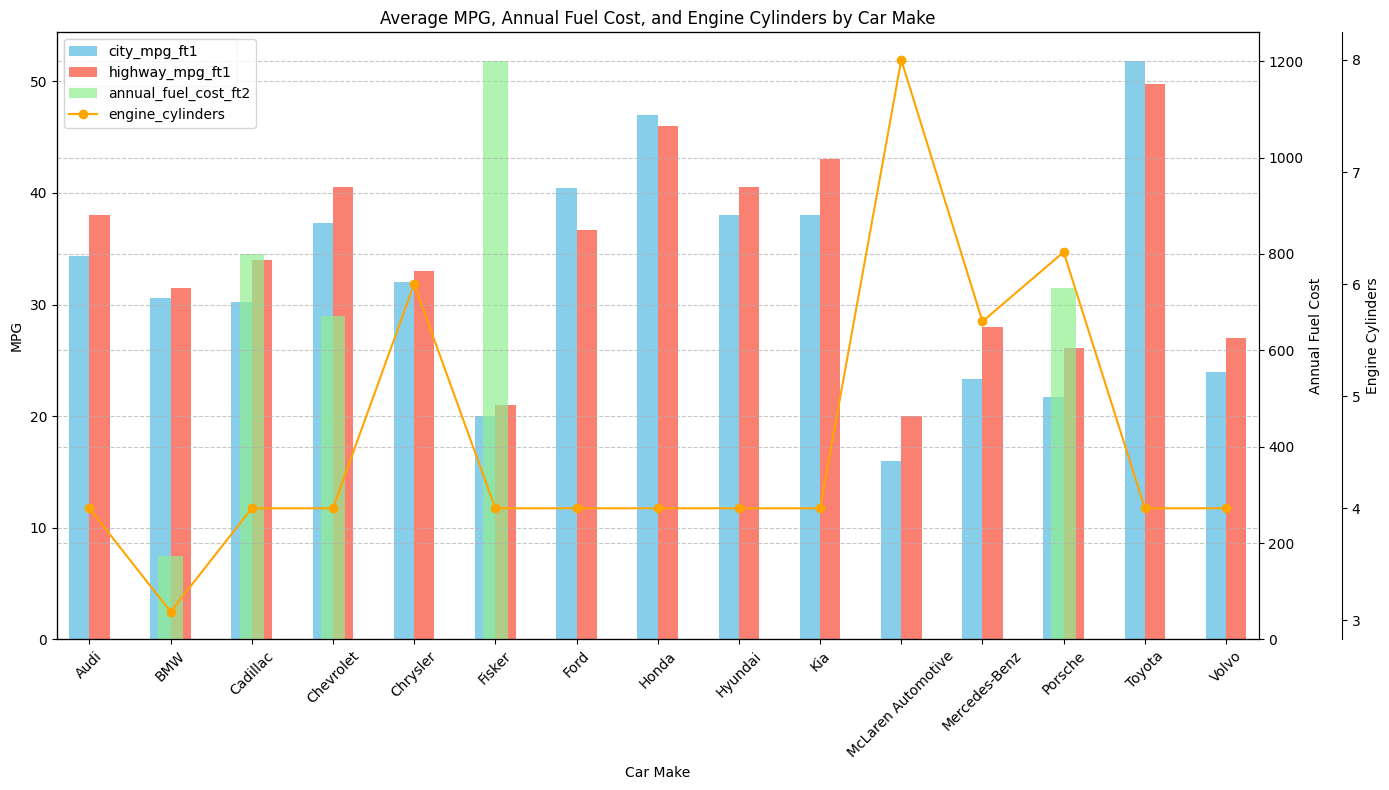

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned fuel data
df = pd.read_csv('clean_fuel.csv')

# Calculate estimated annual fuel cost for rows where 'annual_fuel_cost_ft2' is missing
mean_gas_price = 3.00  # Placeholder for the average cost of gas in dollars per gallon
days_in_year = 365  # Number of days in a year

# Calculate mean between city and highway mpg
df['mean_mpg'] = (df['city_mpg_ft1'] + df['highway_mpg_ft1']) / 2

# Calculate estimated annual fuel cost
df['estimated_annual_fuel_cost'] = (df['mean_mpg'] * mean_gas_price * days_in_year)

# Fill NaN values in the 'annual_fuel_cost_ft2' column with the calculated estimated annual fuel cost
df['annual_fuel_cost_ft2'].fillna(df['estimated_annual_fuel_cost'], inplace=True)

# Group the data by car make and calculate mean city and highway mpg, average annual fuel cost, and average engine cylinder count
mileage_cost_cylinder_by_make = df.groupby('make')[['city_mpg_ft1', 'highway_mpg_ft1', 'annual_fuel_cost_ft2', 'engine_cylinders']].mean()

# Plot the bar graph
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot city and highway mpg on the primary y-axis
mileage_cost_cylinder_by_make[['city_mpg_ft1', 'highway_mpg_ft1']].plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_ylabel('MPG')
ax1.set_xlabel('Car Make')
ax1.tick_params(axis='x', rotation=45)  # Adjust x-axis label rotation
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create a secondary y-axis for annual fuel cost
ax2 = ax1.twinx()
mileage_cost_cylinder_by_make['annual_fuel_cost_ft2'].plot(kind='bar', ax=ax2, color='lightgreen', alpha=0.7, width=0.3)
ax2.set_ylabel('Annual Fuel Cost')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Create another secondary y-axis for engine cylinders
ax3 = ax1.twinx()
mileage_cost_cylinder_by_make['engine_cylinders'].plot(kind='line', ax=ax3, color='orange', marker='o')
ax3.set_ylabel('Engine Cylinders')
ax3.spines['right'].set_position(('outward', 60))

# Adjust legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

# Title
plt.title('Average MPG, Annual Fuel Cost, and Engine Cylinders by Car Make')

# Show the plot
plt.tight_layout()
plt.show()


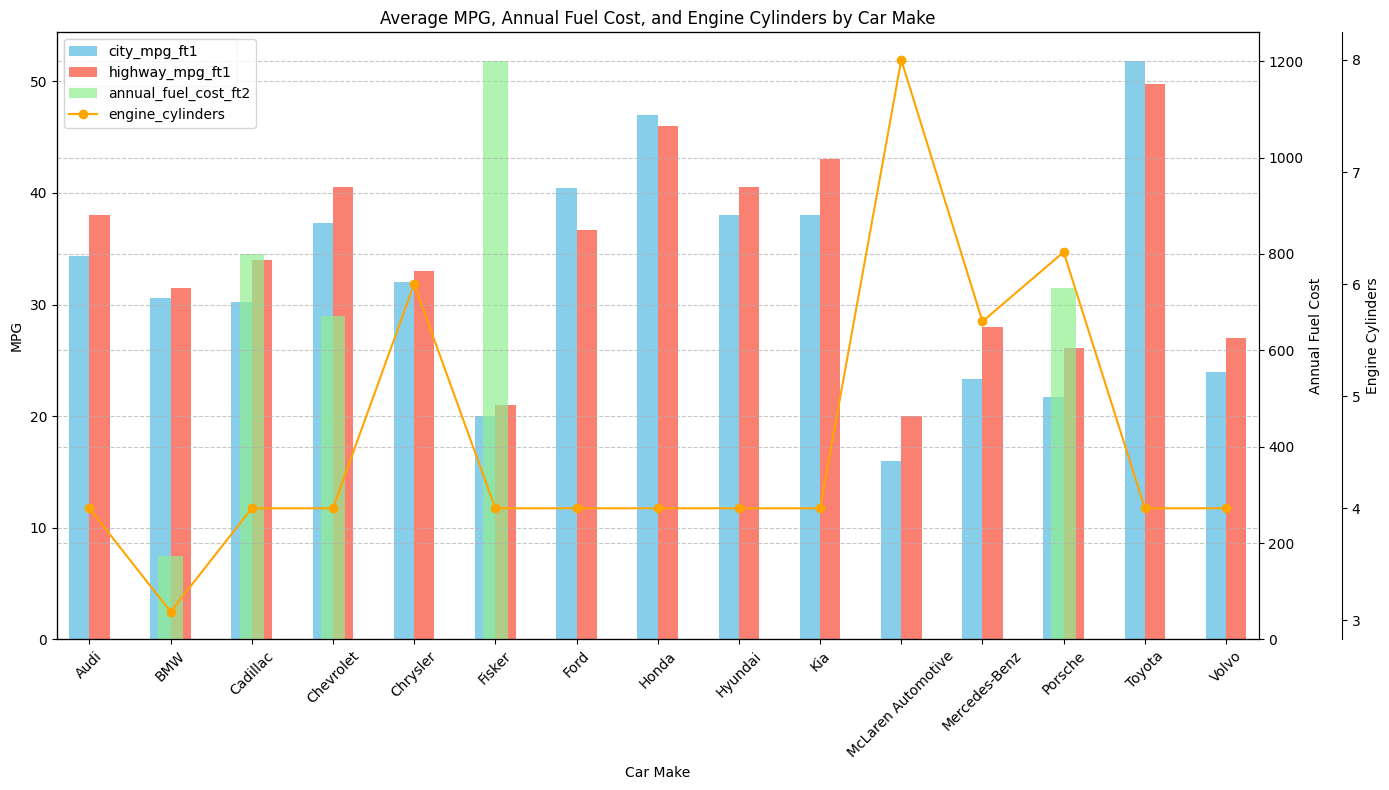

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned fuel data
df = pd.read_csv('clean_fuel.csv')

# Calculate estimated annual fuel cost for rows where 'annual_fuel_cost_ft2' is missing
mean_gas_price = 3.00  # Placeholder for the average cost of gas in dollars per gallon
days_in_year = 365  # Number of days in a year

# Calculate mean between city and highway mpg
df['mean_mpg'] = (df['city_mpg_ft1'] + df['highway_mpg_ft1']) / 2

# Calculate estimated annual fuel cost
df['estimated_annual_fuel_cost'] = (df['mean_mpg'] * mean_gas_price * days_in_year)

# Fill NaN values in the 'annual_fuel_cost_ft2' column with the calculated estimated annual fuel cost
df['annual_fuel_cost_ft2'] = df['annual_fuel_cost_ft2'].fillna(df['estimated_annual_fuel_cost'])

# Group the data by car make and calculate mean city and highway mpg, average annual fuel cost, and average engine cylinder count
mileage_cost_cylinder_by_make = df.groupby('make')[['city_mpg_ft1', 'highway_mpg_ft1', 'annual_fuel_cost_ft2', 'engine_cylinders']].mean()

# Plot the bar graph
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot city and highway mpg on the primary y-axis
mileage_cost_cylinder_by_make[['city_mpg_ft1', 'highway_mpg_ft1']].plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_ylabel('MPG')
ax1.set_xlabel('Car Make')
ax1.tick_params(axis='x', rotation=45)  # Adjust x-axis label rotation
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create a secondary y-axis for annual fuel cost
ax2 = ax1.twinx()
mileage_cost_cylinder_by_make['annual_fuel_cost_ft2'].plot(kind='bar', ax=ax2, color='lightgreen', alpha=0.7, width=0.3)
ax2.set_ylabel('Annual Fuel Cost')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Create another secondary y-axis for engine cylinders
ax3 = ax1.twinx()
mileage_cost_cylinder_by_make['engine_cylinders'].plot(kind='line', ax=ax3, color='orange', marker='o')
ax3.set_ylabel('Engine Cylinders')
ax3.spines['right'].set_position(('outward', 60))

# Adjust legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

# Title
plt.title('Average MPG, Annual Fuel Cost, and Engine Cylinders by Car Make')

# Show the plot
plt.tight_layout()
plt.show()


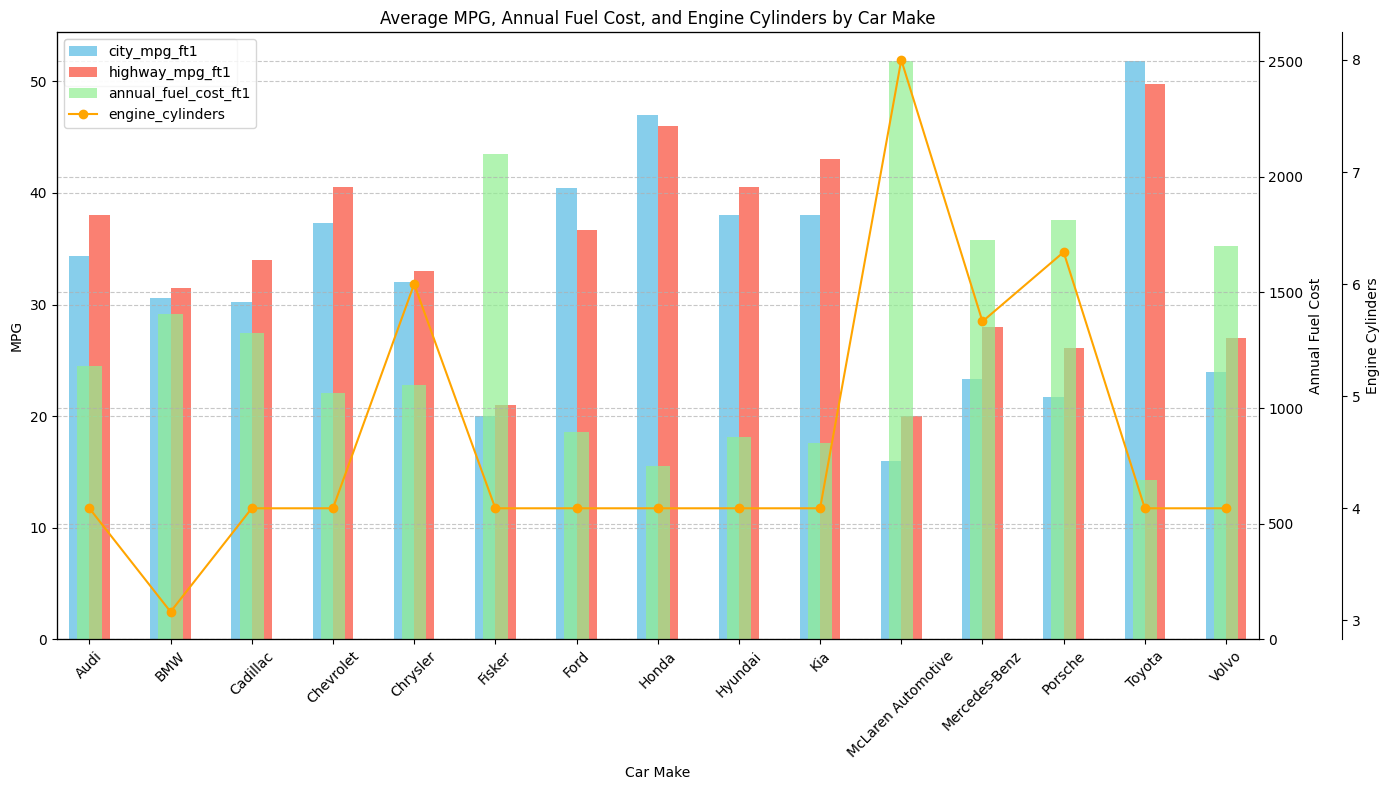

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned fuel data
df = pd.read_csv('clean_fuel.csv')

# Calculate estimated annual fuel cost for rows where 'annual_fuel_cost_ft1' is missing
mean_gas_price = 3.00  # Placeholder for the average cost of gas in dollars per gallon
days_in_year = 365  # Number of days in a year

# Calculate mean between city and highway mpg
df['mean_mpg'] = (df['city_mpg_ft1'] + df['highway_mpg_ft1']) / 2

# Calculate estimated annual fuel cost
df['estimated_annual_fuel_cost'] = (df['mean_mpg'] * mean_gas_price * days_in_year)

# Fill NaN values in the 'annual_fuel_cost_ft1' column with the calculated estimated annual fuel cost
df['annual_fuel_cost_ft1'] = df['annual_fuel_cost_ft1'].fillna(df['estimated_annual_fuel_cost'])

# Group the data by car make and calculate mean city and highway mpg, average annual fuel cost, and average engine cylinder count
mileage_cost_cylinder_by_make = df.groupby('make')[['city_mpg_ft1', 'highway_mpg_ft1', 'annual_fuel_cost_ft1', 'engine_cylinders']].mean()

# Plot the bar graph
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot city and highway mpg on the primary y-axis
mileage_cost_cylinder_by_make[['city_mpg_ft1', 'highway_mpg_ft1']].plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_ylabel('MPG')
ax1.set_xlabel('Car Make')
ax1.tick_params(axis='x', rotation=45)  # Adjust x-axis label rotation
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create a secondary y-axis for annual fuel cost
ax2 = ax1.twinx()
mileage_cost_cylinder_by_make['annual_fuel_cost_ft1'].plot(kind='bar', ax=ax2, color='lightgreen', alpha=0.7, width=0.3)
ax2.set_ylabel('Annual Fuel Cost')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Create another secondary y-axis for engine cylinders
ax3 = ax1.twinx()
mileage_cost_cylinder_by_make['engine_cylinders'].plot(kind='line', ax=ax3, color='orange', marker='o')
ax3.set_ylabel('Engine Cylinders')
ax3.spines['right'].set_position(('outward', 60))

# Adjust legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

# Title
plt.title('Average MPG, Annual Fuel Cost, and Engine Cylinders by Car Make')

# Show the plot
plt.tight_layout()
plt.show()


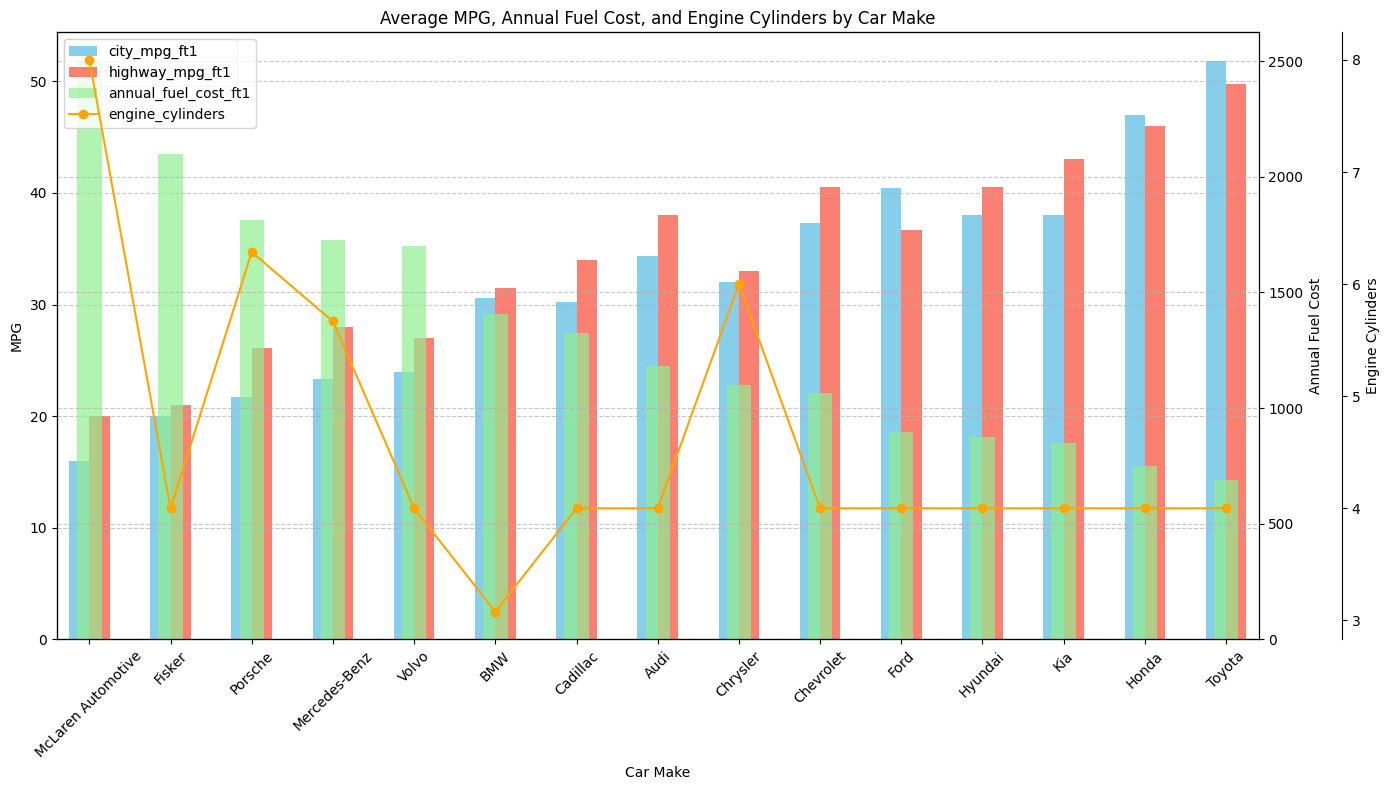

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned fuel data
df = pd.read_csv('clean_fuel.csv')

# Calculate estimated annual fuel cost for rows where 'annual_fuel_cost_ft1' is missing
mean_gas_price = 3.00  # Placeholder for the average cost of gas in dollars per gallon
days_in_year = 365  # Number of days in a year

# Calculate mean between city and highway mpg
df['mean_mpg'] = (df['city_mpg_ft1'] + df['highway_mpg_ft1']) / 2

# Calculate estimated annual fuel cost
df['estimated_annual_fuel_cost'] = (df['mean_mpg'] * mean_gas_price * days_in_year)

# Fill NaN values in the 'annual_fuel_cost_ft1' column with the calculated estimated annual fuel cost
df['annual_fuel_cost_ft1'] = df['annual_fuel_cost_ft1'].fillna(df['estimated_annual_fuel_cost'])

# Group the data by car make and calculate mean city and highway mpg, average annual fuel cost, and average engine cylinder count
mileage_cost_cylinder_by_make = df.groupby('make')[['city_mpg_ft1', 'highway_mpg_ft1', 'annual_fuel_cost_ft1', 'engine_cylinders']].mean()

# Sort the DataFrame by 'annual_fuel_cost_ft1' in descending order
mileage_cost_cylinder_by_make = mileage_cost_cylinder_by_make.sort_values(by='annual_fuel_cost_ft1', ascending=False)

# Plot the bar graph
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot city and highway mpg on the primary y-axis
mileage_cost_cylinder_by_make[['city_mpg_ft1', 'highway_mpg_ft1']].plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_ylabel('MPG')
ax1.set_xlabel('Car Make')
ax1.tick_params(axis='x', rotation=45)  # Adjust x-axis label rotation
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create a secondary y-axis for annual fuel cost
ax2 = ax1.twinx()
mileage_cost_cylinder_by_make['annual_fuel_cost_ft1'].plot(kind='bar', ax=ax2, color='lightgreen', alpha=0.7, width=0.3)
ax2.set_ylabel('Annual Fuel Cost')
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Create another secondary y-axis for engine cylinders
ax3 = ax1.twinx()
mileage_cost_cylinder_by_make['engine_cylinders'].plot(kind='line', ax=ax3, color='orange', marker='o')
ax3.set_ylabel('Engine Cylinders')
ax3.spines['right'].set_position(('outward', 60))

# Adjust legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

# Title
plt.title('Average MPG, Annual Fuel Cost, and Engine Cylinders by Car Make')

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\eddum\AppData\Local\Temp\ipykernel_19480\1573127917.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mileage_cost_cylinder_by_make.index, y='annual_fuel_cost_ft1', data=mileage_cost_cylinder_by_make, palette="viridis")


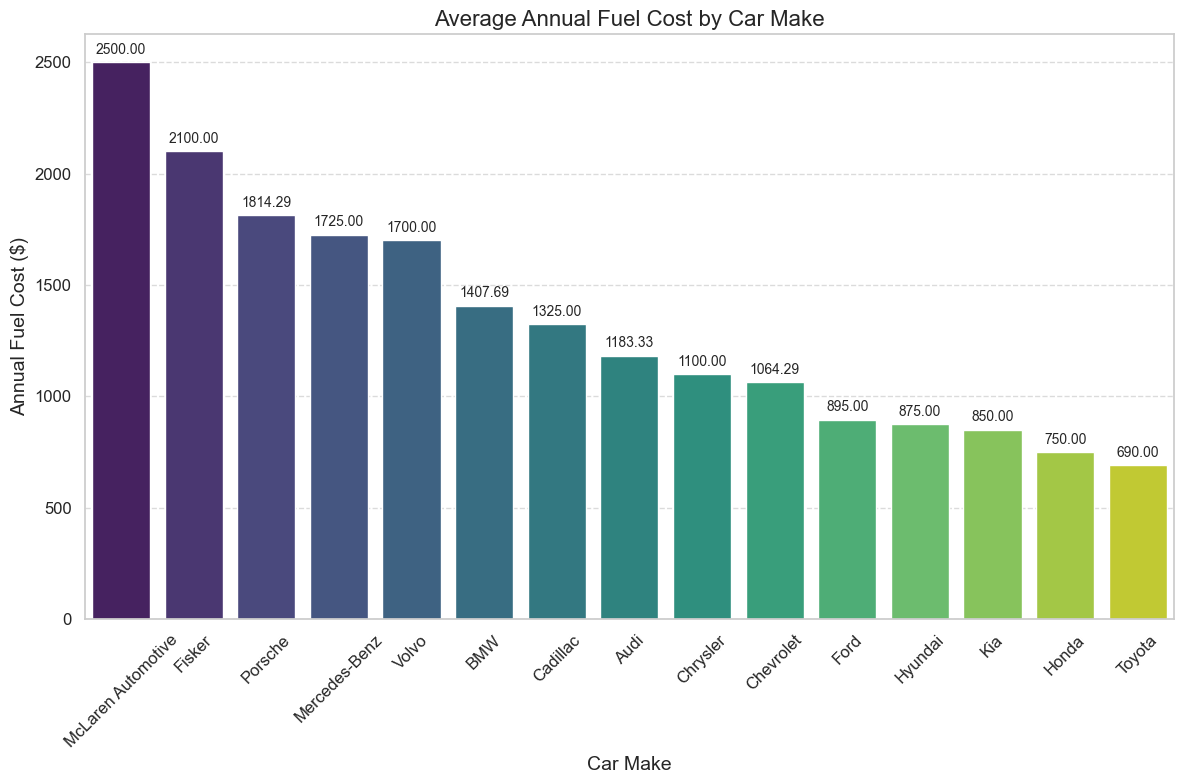

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned fuel data
df = pd.read_csv('clean_fuel.csv')

# Calculate estimated annual fuel cost for rows where 'annual_fuel_cost_ft1' is missing
mean_gas_price = 3.00  # Placeholder for the average cost of gas in dollars per gallon
days_in_year = 365  # Number of days in a year

# Calculate mean between city and highway mpg
df['mean_mpg'] = (df['city_mpg_ft1'] + df['highway_mpg_ft1']) / 2

# Calculate estimated annual fuel cost
df['estimated_annual_fuel_cost'] = (df['mean_mpg'] * mean_gas_price * days_in_year)

# Fill NaN values in the 'annual_fuel_cost_ft1' column with the calculated estimated annual fuel cost
df['annual_fuel_cost_ft1'] = df['annual_fuel_cost_ft1'].fillna(df['estimated_annual_fuel_cost'])

# Group the data by car make and calculate mean city and highway mpg, average annual fuel cost, and average engine cylinder count
mileage_cost_cylinder_by_make = df.groupby('make')[['city_mpg_ft1', 'highway_mpg_ft1', 'annual_fuel_cost_ft1', 'engine_cylinders']].mean()

# Sort the DataFrame by 'annual_fuel_cost_ft1' in descending order
mileage_cost_cylinder_by_make = mileage_cost_cylinder_by_make.sort_values(by='annual_fuel_cost_ft1', ascending=False)

# Plot the bar graph
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Plot annual fuel cost
ax = sns.barplot(x=mileage_cost_cylinder_by_make.index, y='annual_fuel_cost_ft1', data=mileage_cost_cylinder_by_make, palette="viridis")
ax.set_xlabel('Car Make', fontsize=14)
ax.set_ylabel('Annual Fuel Cost ($)', fontsize=14)
ax.set_title('Average Annual Fuel Cost by Car Make', fontsize=16)
ax.tick_params(axis='x', rotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                   fontsize=10)

plt.tight_layout()
plt.show()


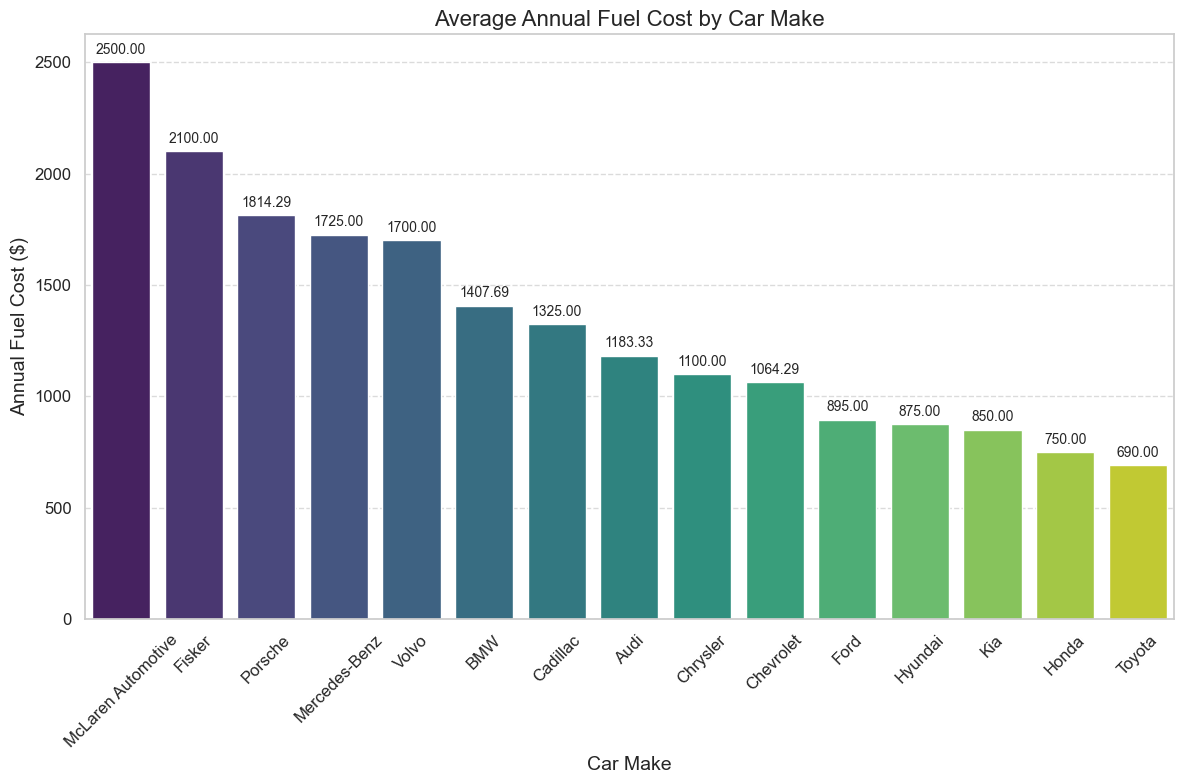

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned fuel data
df = pd.read_csv('clean_fuel.csv')

# Calculate estimated annual fuel cost for rows where 'annual_fuel_cost_ft1' is missing
mean_gas_price = 3.00  # Placeholder for the average cost of gas in dollars per gallon
days_in_year = 365  # Number of days in a year

# Calculate mean between city and highway mpg
df['mean_mpg'] = (df['city_mpg_ft1'] + df['highway_mpg_ft1']) / 2

# Calculate estimated annual fuel cost
df['estimated_annual_fuel_cost'] = (df['mean_mpg'] * mean_gas_price * days_in_year)

# Fill NaN values in the 'annual_fuel_cost_ft1' column with the calculated estimated annual fuel cost
df['annual_fuel_cost_ft1'] = df['annual_fuel_cost_ft1'].fillna(df['estimated_annual_fuel_cost'])

# Group the data by car make and calculate mean city and highway mpg, average annual fuel cost, and average engine cylinder count
mileage_cost_cylinder_by_make = df.groupby('make')[['city_mpg_ft1', 'highway_mpg_ft1', 'annual_fuel_cost_ft1', 'engine_cylinders']].mean()

# Sort the DataFrame by 'annual_fuel_cost_ft1' in descending order
mileage_cost_cylinder_by_make = mileage_cost_cylinder_by_make.sort_values(by='annual_fuel_cost_ft1', ascending=False)

# Plot the bar graph
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Plot annual fuel cost
ax = sns.barplot(x=mileage_cost_cylinder_by_make.index, y='annual_fuel_cost_ft1', hue=mileage_cost_cylinder_by_make.index, data=mileage_cost_cylinder_by_make, palette="viridis", dodge=False)
ax.set_xlabel('Car Make', fontsize=14)
ax.set_ylabel('Annual Fuel Cost ($)', fontsize=14)
ax.set_title('Average Annual Fuel Cost by Car Make', fontsize=16)
ax.tick_params(axis='x', rotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend([],[], frameon=False)  # Hide legend

# Add annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                   fontsize=10)

plt.tight_layout()
plt.show()


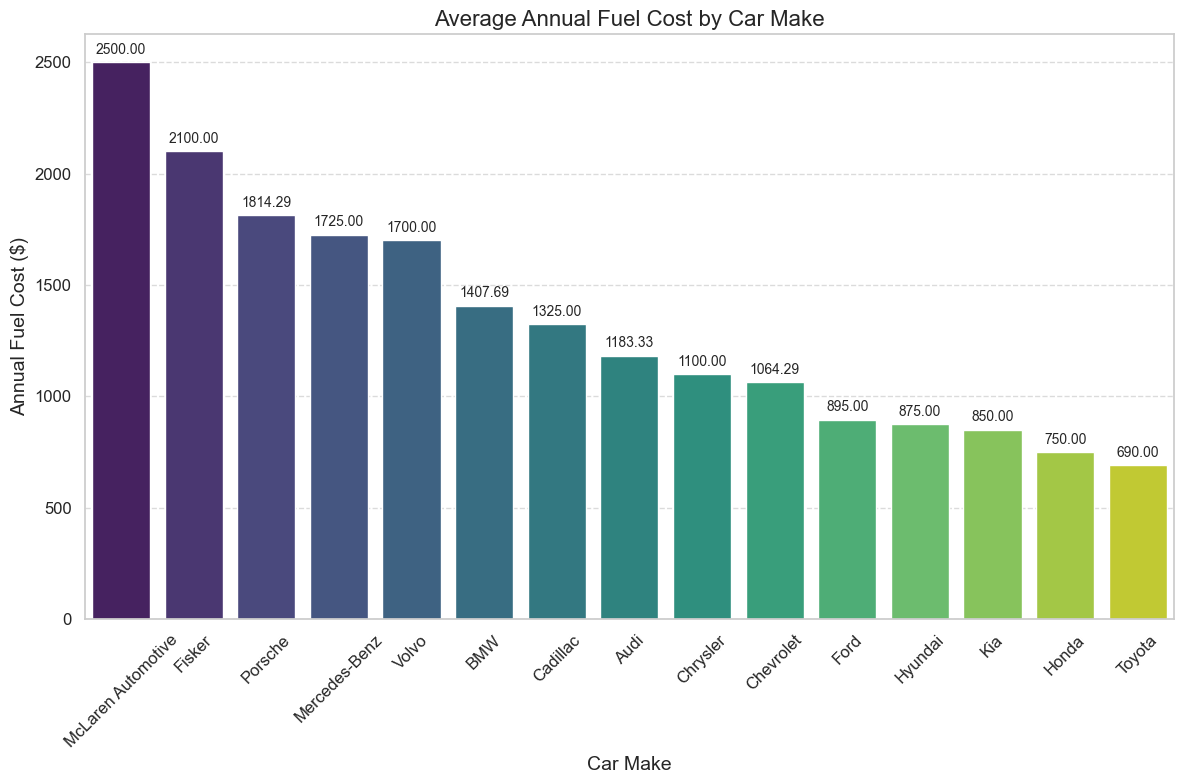

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned fuel data
df = pd.read_csv('clean_fuel.csv')

# Calculate estimated annual fuel cost for rows where 'annual_fuel_cost_ft1' is missing
mean_gas_price = 3.00  # Placeholder for the average cost of gas in dollars per gallon
days_in_year = 365  # Number of days in a year

# Calculate mean between city and highway mpg
df['mean_mpg'] = (df['city_mpg_ft1'] + df['highway_mpg_ft1']) / 2

# Calculate estimated annual fuel cost
df['estimated_annual_fuel_cost'] = (df['mean_mpg'] * mean_gas_price * days_in_year)

# Fill NaN values in the 'annual_fuel_cost_ft1' column with the calculated estimated annual fuel cost
df['annual_fuel_cost_ft1'] = df['annual_fuel_cost_ft1'].fillna(df['estimated_annual_fuel_cost'])

# Group the data by car make and calculate mean city and highway mpg, average annual fuel cost, and average engine cylinder count
mileage_cost_cylinder_by_make = df.groupby('make')[['city_mpg_ft1', 'highway_mpg_ft1', 'annual_fuel_cost_ft1', 'engine_cylinders']].mean()

# Sort the DataFrame by 'annual_fuel_cost_ft1' in descending order
mileage_cost_cylinder_by_make = mileage_cost_cylinder_by_make.sort_values(by='annual_fuel_cost_ft1', ascending=False)

# Plot the bar graph
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Plot annual fuel cost
ax = sns.barplot(x=mileage_cost_cylinder_by_make.index, y='annual_fuel_cost_ft1', hue=mileage_cost_cylinder_by_make.index, data=mileage_cost_cylinder_by_make, palette="viridis", dodge=False)
ax.set_xlabel('Car Make', fontsize=14)
ax.set_ylabel('Annual Fuel Cost ($)', fontsize=14)
ax.set_title('Average Annual Fuel Cost by Car Make', fontsize=16)
ax.tick_params(axis='x', rotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend([],[], frameon=False)  # Hide legend

# Add annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                   fontsize=10)

plt.tight_layout()
plt.show()


C:\Users\eddum\AppData\Local\Temp\ipykernel_19480\1869653504.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mileage_cost_cylinder_by_make.index, y='city_mpg_ft1', data=mileage_cost_cylinder_by_make, palette="Blues_r")
C:\Users\eddum\AppData\Local\Temp\ipykernel_19480\1869653504.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mileage_cost_cylinder_by_make.index, y='highway_mpg_ft1', data=mileage_cost_cylinder_by_make, palette="Greens_r")


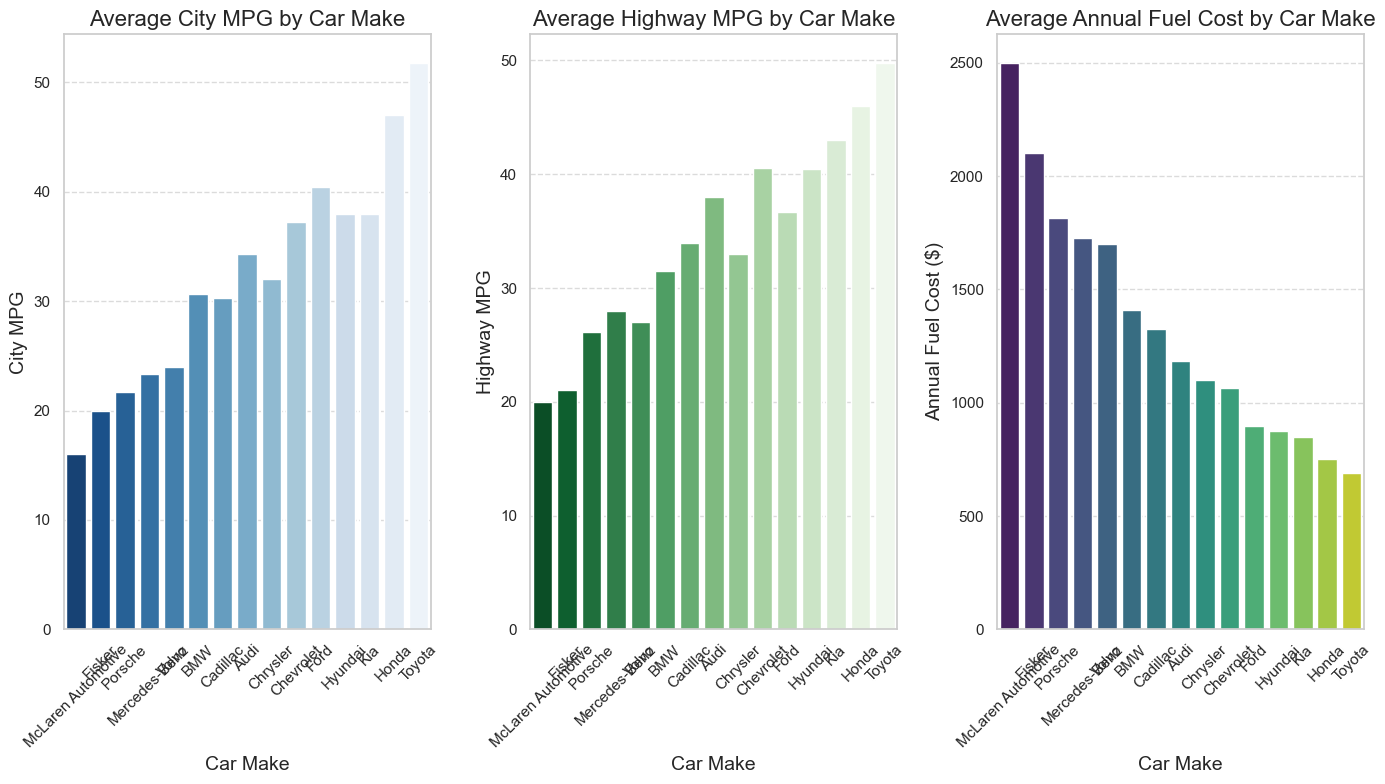

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned fuel data
df = pd.read_csv('clean_fuel.csv')

# Calculate estimated annual fuel cost for rows where 'annual_fuel_cost_ft1' is missing
mean_gas_price = 3.00  # Placeholder for the average cost of gas in dollars per gallon
days_in_year = 365  # Number of days in a year

# Calculate mean between city and highway mpg
df['mean_mpg'] = (df['city_mpg_ft1'] + df['highway_mpg_ft1']) / 2

# Calculate estimated annual fuel cost
df['estimated_annual_fuel_cost'] = (df['mean_mpg'] * mean_gas_price * days_in_year)

# Fill NaN values in the 'annual_fuel_cost_ft1' column with the calculated estimated annual fuel cost
df['annual_fuel_cost_ft1'] = df['annual_fuel_cost_ft1'].fillna(df['estimated_annual_fuel_cost'])

# Group the data by car make and calculate mean city and highway mpg, average annual fuel cost, and average engine cylinder count
mileage_cost_cylinder_by_make = df.groupby('make')[['city_mpg_ft1', 'highway_mpg_ft1', 'annual_fuel_cost_ft1', 'engine_cylinders']].mean()

# Sort the DataFrame by 'annual_fuel_cost_ft1' in descending order
mileage_cost_cylinder_by_make = mileage_cost_cylinder_by_make.sort_values(by='annual_fuel_cost_ft1', ascending=False)

# Plot the bar graphs side by side
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Plot city MPG
plt.subplot(1, 3, 1)
sns.barplot(x=mileage_cost_cylinder_by_make.index, y='city_mpg_ft1', data=mileage_cost_cylinder_by_make, palette="Blues_r")
plt.xlabel('Car Make', fontsize=14)
plt.ylabel('City MPG', fontsize=14)
plt.title('Average City MPG by Car Make', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot highway MPG
plt.subplot(1, 3, 2)
sns.barplot(x=mileage_cost_cylinder_by_make.index, y='highway_mpg_ft1', data=mileage_cost_cylinder_by_make, palette="Greens_r")
plt.xlabel('Car Make', fontsize=14)
plt.ylabel('Highway MPG', fontsize=14)
plt.title('Average Highway MPG by Car Make', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot annual fuel cost
plt.subplot(1, 3, 3)
sns.barplot(x=mileage_cost_cylinder_by_make.index, y='annual_fuel_cost_ft1', hue=mileage_cost_cylinder_by_make.index, data=mileage_cost_cylinder_by_make, palette="viridis", dodge=False)
plt.xlabel('Car Make', fontsize=14)
plt.ylabel('Annual Fuel Cost ($)', fontsize=14)
plt.title('Average Annual Fuel Cost by Car Make', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([],[], frameon=False)  # Hide legend

plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

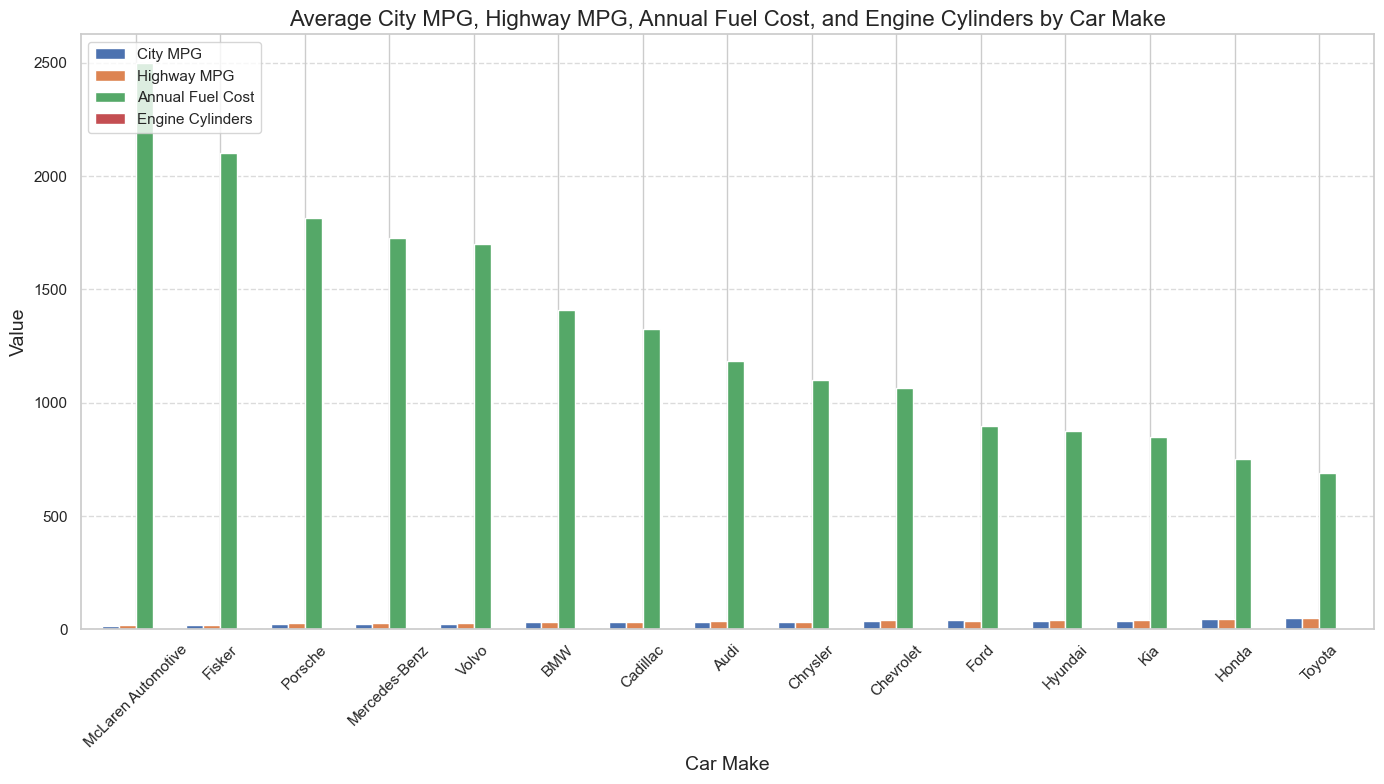

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned fuel data
df = pd.read_csv('clean_fuel.csv')

# Calculate estimated annual fuel cost for rows where 'annual_fuel_cost_ft1' is missing
mean_gas_price = 3.00  # Placeholder for the average cost of gas in dollars per gallon
days_in_year = 365  # Number of days in a year

# Calculate mean between city and highway mpg
df['mean_mpg'] = (df['city_mpg_ft1'] + df['highway_mpg_ft1']) / 2

# Calculate estimated annual fuel cost
df['estimated_annual_fuel_cost'] = (df['mean_mpg'] * mean_gas_price * days_in_year)

# Fill NaN values in the 'annual_fuel_cost_ft1' column with the calculated estimated annual fuel cost
df['annual_fuel_cost_ft1'] = df['annual_fuel_cost_ft1'].fillna(df['estimated_annual_fuel_cost'])

# Group the data by car make and calculate mean city and highway mpg, average annual fuel cost, and average engine cylinder count
mileage_cost_cylinder_by_make = df.groupby('make')[['city_mpg_ft1', 'highway_mpg_ft1', 'annual_fuel_cost_ft1', 'engine_cylinders']].mean()

# Sort the DataFrame by 'annual_fuel_cost_ft1' in descending order
mileage_cost_cylinder_by_make = mileage_cost_cylinder_by_make.sort_values(by='annual_fuel_cost_ft1', ascending=False)

# Plot the bar graph
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Plot all parameters in a grouped bar plot
ax = mileage_cost_cylinder_by_make.plot(kind='bar', figsize=(14, 8), width=0.8)

# Add labels and titles
plt.xlabel('Car Make', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Average City MPG, Highway MPG, Annual Fuel Cost, and Engine Cylinders by Car Make', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['City MPG', 'Highway MPG', 'Annual Fuel Cost', 'Engine Cylinders'], loc='upper left')

plt.tight_layout()
plt.show()


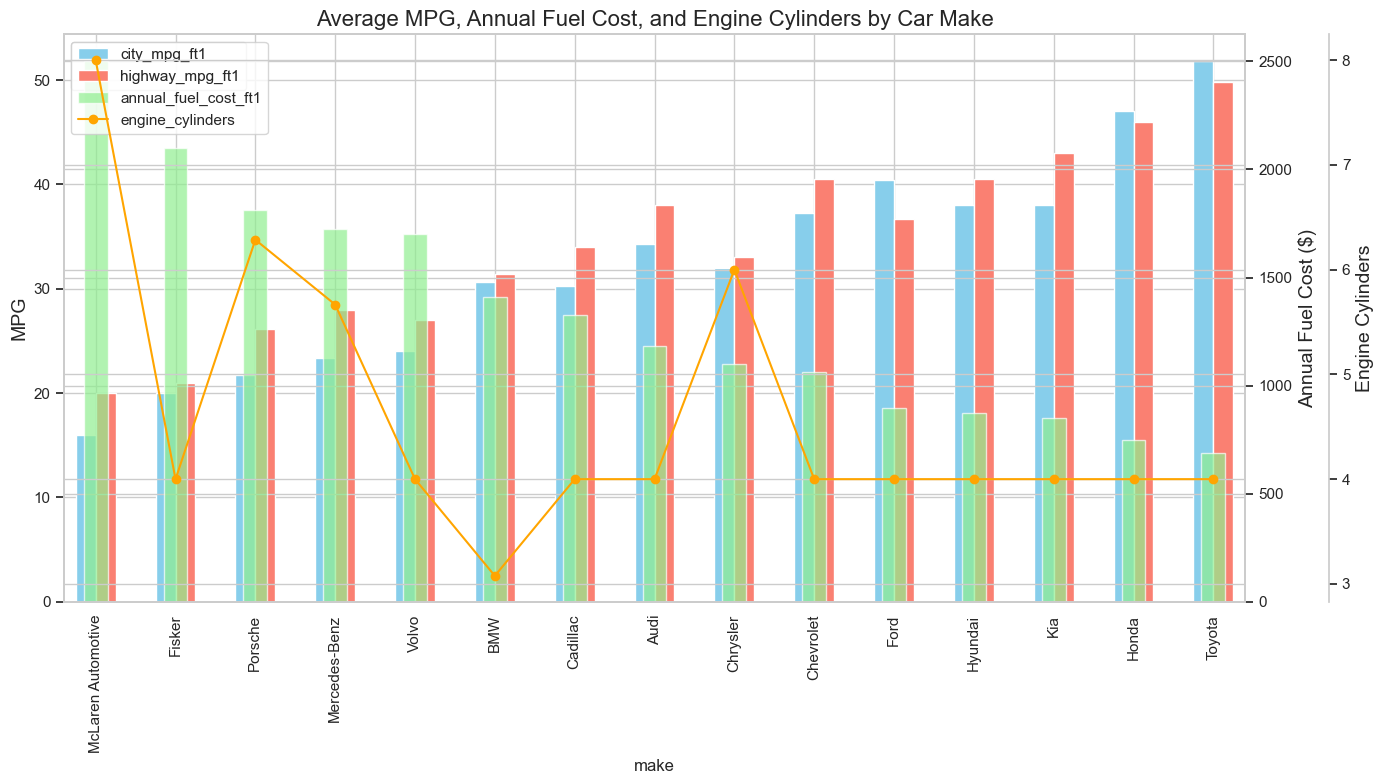

KeyError: "None of [Index(['city_mpg', 'highway_mpg'], dtype='object')] are in the [columns]"

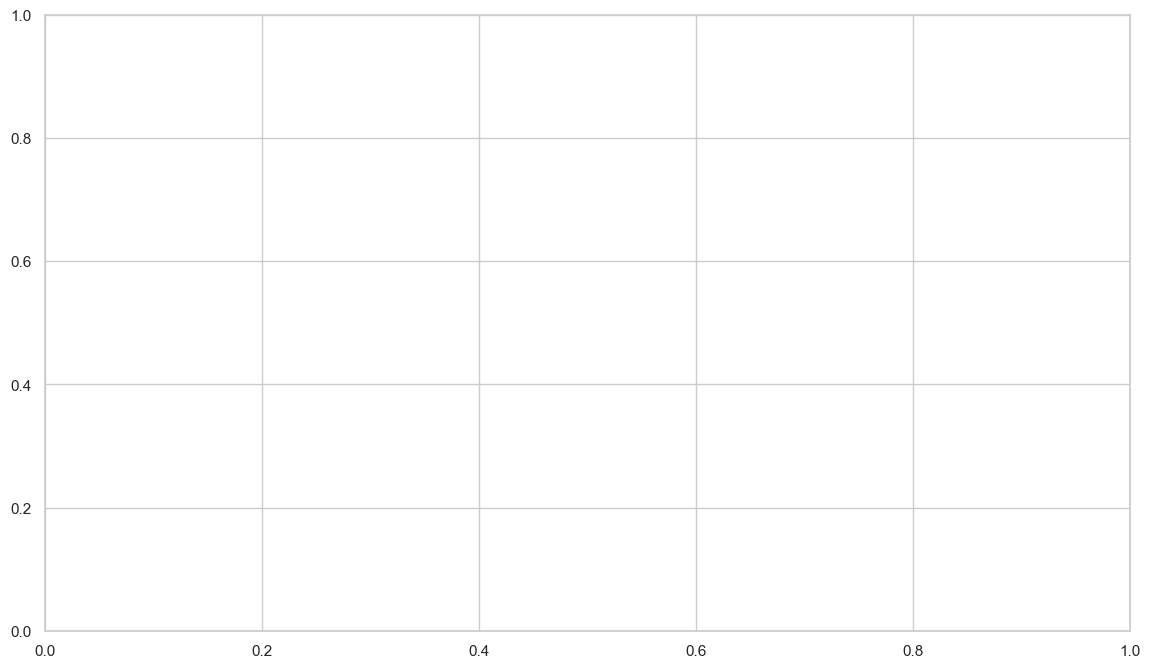

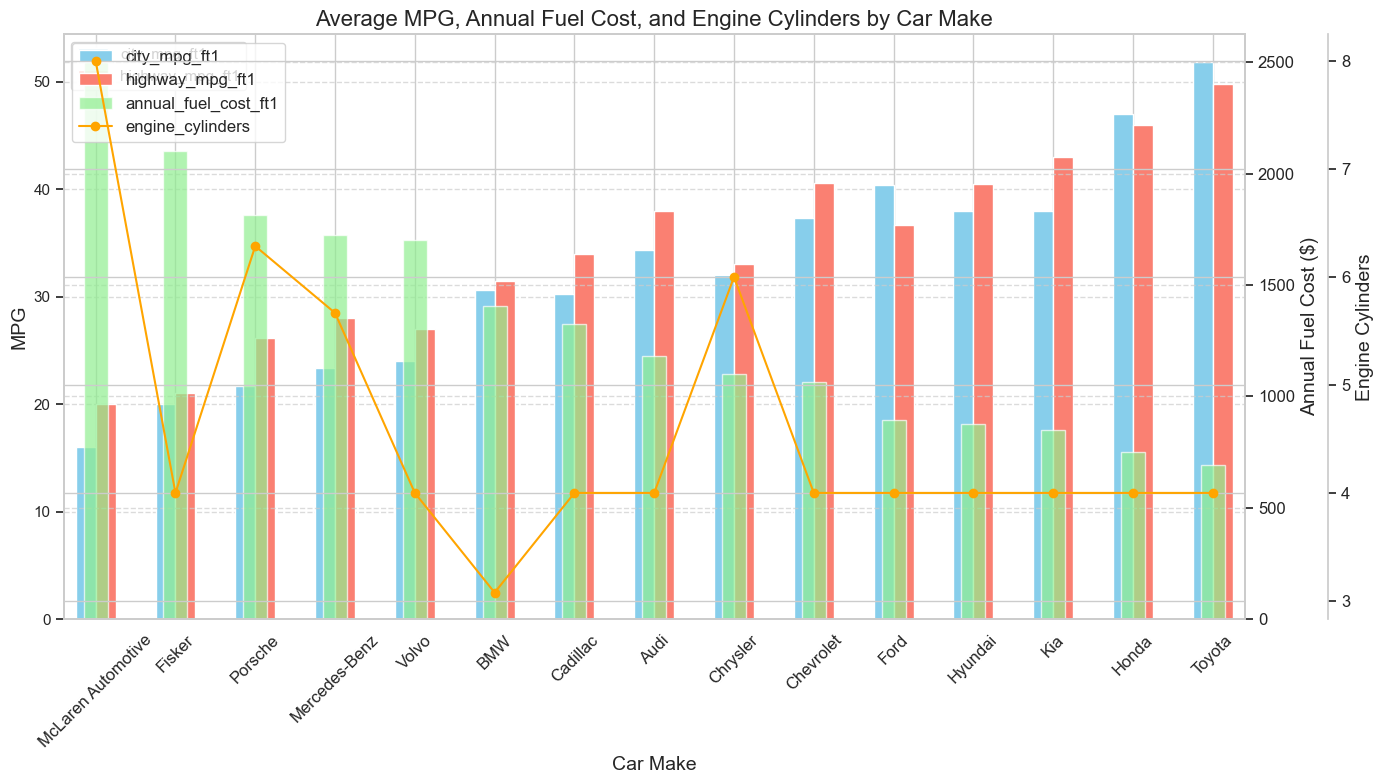

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned fuel data
df = pd.read_csv('clean_fuel.csv')

# Calculate estimated annual fuel cost for rows where 'annual_fuel_cost_ft1' is missing
mean_gas_price = 3.00  # Placeholder for the average cost of gas in dollars per gallon
days_in_year = 365  # Number of days in a year

# Calculate mean between city and highway mpg
df['mean_mpg'] = (df['city_mpg_ft1'] + df['highway_mpg_ft1']) / 2

# Calculate estimated annual fuel cost
df['estimated_annual_fuel_cost'] = (df['mean_mpg'] * mean_gas_price * days_in_year)

# Fill NaN values in the 'annual_fuel_cost_ft1' column with the calculated estimated annual fuel cost
df['annual_fuel_cost_ft1'] = df['annual_fuel_cost_ft1'].fillna(df['estimated_annual_fuel_cost'])

# Group the data by car make and calculate mean city and highway mpg, average annual fuel cost, and average engine cylinder count
mileage_cost_cylinder_by_make = df.groupby('make')[['city_mpg_ft1', 'highway_mpg_ft1', 'annual_fuel_cost_ft1', 'engine_cylinders']].mean()

# Sort the DataFrame by 'annual_fuel_cost_ft1' in descending order
mileage_cost_cylinder_by_make = mileage_cost_cylinder_by_make.sort_values(by='annual_fuel_cost_ft1', ascending=False)

# Plot the bar graph
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot city and highway mpg on the primary y-axis
mileage_cost_cylinder_by_make[['city_mpg_ft1', 'highway_mpg_ft1']].plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_ylabel('MPG', fontsize=14)
ax1.set_xlabel('Car Make', fontsize=14)
ax1.tick_params(axis='x', rotation=45, labelsize=12)  # Adjust x-axis label rotation and font size
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create a secondary y-axis for annual fuel cost
ax2 = ax1.twinx()
mileage_cost_cylinder_by_make['annual_fuel_cost_ft1'].plot(kind='bar', ax=ax2, color='lightgreen', alpha=0.7, width=0.3)
ax2.set_ylabel('Annual Fuel Cost ($)', fontsize=14)
ax2.tick_params(axis='y', labelsize=12)  # Adjust y-axis font size
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Create another secondary y-axis for engine cylinders
ax3 = ax1.twinx()
mileage_cost_cylinder_by_make['engine_cylinders'].plot(kind='line', ax=ax3, color='orange', marker='o')
ax3.set_ylabel('Engine Cylinders', fontsize=14)
ax3.tick_params(axis='y', labelsize=12)  # Adjust y-axis font size
ax3.spines['right'].set_position(('outward', 60))

# Adjust legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left', fontsize=12)  # Adjust legend font size

# Title
plt.title('Average MPG, Annual Fuel Cost, and Engine Cylinders by Car Make', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned fuel data
df = pd.read_csv('clean_fuel.csv')

# Calculate estimated annual fuel cost for rows where 'annual_fuel_cost_ft1' is missing
mean_gas_price = 3.00  # Placeholder for the average cost of gas in dollars per gallon
days_in_year = 365  # Number of days in a year

# Calculate mean between city and highway mpg
df['mean_mpg'] = (df['City MPG'] + df['Highway MPG']) / 2

# Calculate estimated annual fuel cost
df['estimated_annual_fuel_cost'] = (df['mean_mpg'] * mean_gas_price * days_in_year)

# Fill NaN values in the 'annual_fuel_cost_ft1' column with the calculated estimated annual fuel cost
df['Annual Fuel Cost ($)'] = df['Annual Fuel Cost ($)'].fillna(df['estimated_annual_fuel_cost'])

# Group the data by car make and calculate mean city and highway mpg, average annual fuel cost, and average engine cylinder count
mileage_cost_cylinder_by_make = df.groupby('Make')[['City MPG', 'Highway MPG', 'Annual Fuel Cost ($)', 'Engine Cylinders']].mean()

# Sort the DataFrame by 'Annual Fuel Cost ($)' in descending order
mileage_cost_cylinder_by_make = mileage_cost_cylinder_by_make.sort_values(by='Annual Fuel Cost ($)', ascending=False)

# Plot the bar graph
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot city and highway mpg on the primary y-axis
mileage_cost_cylinder_by_make[['City MPG', 'Highway MPG']].plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_ylabel('Miles per Gallon (MPG)', fontsize=14)
ax1.set_xlabel('Car Make', fontsize=14)
ax1.tick_params(axis='x', rotation=45, labelsize=12)  # Adjust x-axis label rotation and font size

# Create a secondary y-axis for annual fuel cost
ax2 = ax1.twinx()
mileage_cost_cylinder_by_make['Annual Fuel Cost ($)'].plot(kind='bar', ax=ax2, color='lightgreen', alpha=0.7, width=0.3)
ax2.set_ylabel('Annual Fuel Cost ($)', fontsize=14)

# Create another secondary y-axis for engine cylinders
ax3 = ax1.twinx()
mileage_cost_cylinder_by_make['Engine Cylinders'].plot(kind='line', ax=ax3, color='orange', marker='o')
ax3.set_ylabel('Engine Cylinders', fontsize=14)
ax3.spines['right'].set_position(('outward', 60))

# Adjust legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3, ['City MPG', 'Highway MPG', 'Annual Fuel Cost ($)', 'Engine Cylinders'], loc='upper left', fontsize=12)

# Title
plt.title('Average MPG, Annual Fuel Cost, and Engine Cylinders by Car Make', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


KeyError: 'City MPG'